In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [98]:
df = pd.read_csv(
    'data/rawdata/combined_dataform3.csv')

In [99]:
df


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Personal => Stipan Alexander,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Personal,Ereignistag,Fahrer Zeit,T.Pause,gesetzl. Pause,Insgesamt,Std. Lohn,Lohn,Soll,+- Diff.,NaN
2,Stipan Alexander,2021-02-01 00:00:00,731,NaN,45,686,0,0,9,2.433333333333334,NaN
3,Personal,Ereignistag,Auftrag Nr.,Fahrtrichtung,Beginn Auftrag,Abholung/ Zustellung,Pause,Ende Auftrag,Auftragszeit Insgesamt,Std. Lohn,Lohn
4,Stipan Alexander,2021-02-01 00:00:00,200003,Hinfahrt,01.02.2021 07:54,08:00,NaN,01.02.2021 20:05,731,0,0
...,...,...,...,...,...,...,...,...,...,...,...
190,Personal,Ereignistag,Auftrag Nr.,Fahrtrichtung,Beginn Auftrag,Abholung/ Zustellung,Pause,Ende Auftrag,Auftragszeit Insgesamt,Std. Lohn,Lohn
191,Stipan Alexander,2021-04-30 00:00:00,200412,Hinfahrt,30.04.2021 07:18,07:30,29,30.04.2021 18:03,616,0,0
192,NaN,NaN,NaN,NaN,NaN,11584,NaN,0,NaN,25.06666666666668,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
df.rename(columns={'Unnamed: 0': 'id', 'Unnamed: 1': 'date','Unnamed: 2': 'drive_time_min', 'Unnamed: 4': 'pause_had_min'}, inplace=True)

In [101]:
clean = df.loc[df['id'] == 'Stipan Alexander']

In [102]:
clean_columns = clean.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 3'], axis=1)

In [103]:
df = clean_columns
df['drive_time_min'] = df['drive_time_min'].astype(int)

In [104]:
df = df.drop(df[(df['drive_time_min'] > 1000)].index)

In [105]:
df.isnull().sum()

id                0
date              0
drive_time_min    0
pause_had_min     0
dtype: int64

In [106]:
df['pause_had_min'] = df['pause_had_min'].astype(int)
df['pause_should_min'] = df['pause_had_min']
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')

In [107]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 2 to 189
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                60 non-null     object        
 1   date              60 non-null     datetime64[ns]
 2   drive_time_min    60 non-null     int32         
 3   pause_had_min     60 non-null     int32         
 4   pause_should_min  60 non-null     int32         
dtypes: datetime64[ns](1), int32(3), object(1)
memory usage: 2.1+ KB


In [108]:
df = df.drop(df[df['drive_time_min'] < 180].index)

In [109]:
df['total_time_hour'] = (df['drive_time_min'] + df['pause_should_min']) / 60

In [110]:
df.describe()

,date,drive_time_min,pause_had_min,pause_should_min,total_time_hour
count,60,60.000000,60.000000,60.000000,60.000000
mean,2021-03-16 07:12:00,600.883333,42.950000,42.950000,10.730556
min,2021-02-01 00:00:00,519.000000,30.000000,30.000000,9.300000
25%,2021-02-21 06:00:00,575.500000,45.000000,45.000000,10.341667
50%,2021-03-13 12:00:00,594.500000,45.000000,45.000000,10.658333
75%,2021-04-12 06:00:00,614.250000,45.000000,45.000000,10.987500
max,2021-04-30 00:00:00,731.000000,45.000000,45.000000,12.933333
std,NaN,37.974609,5.040262,5.040262,0.674049


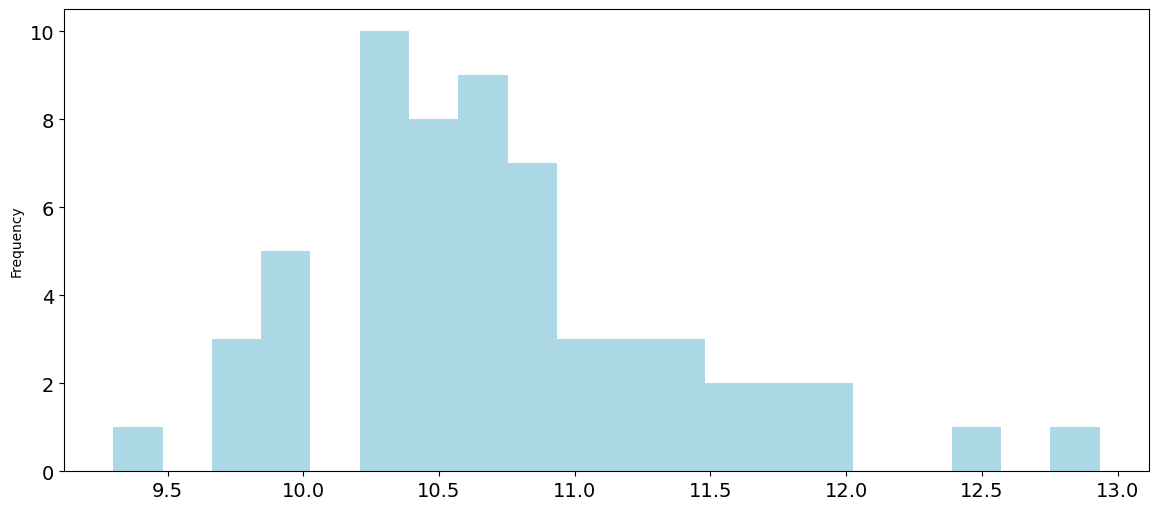

In [111]:
x = df['total_time_hour'].plot(kind='hist', figsize=(14, 6), bins=20, fontsize=14, color='lightblue')


<Axes: xlabel='date'>

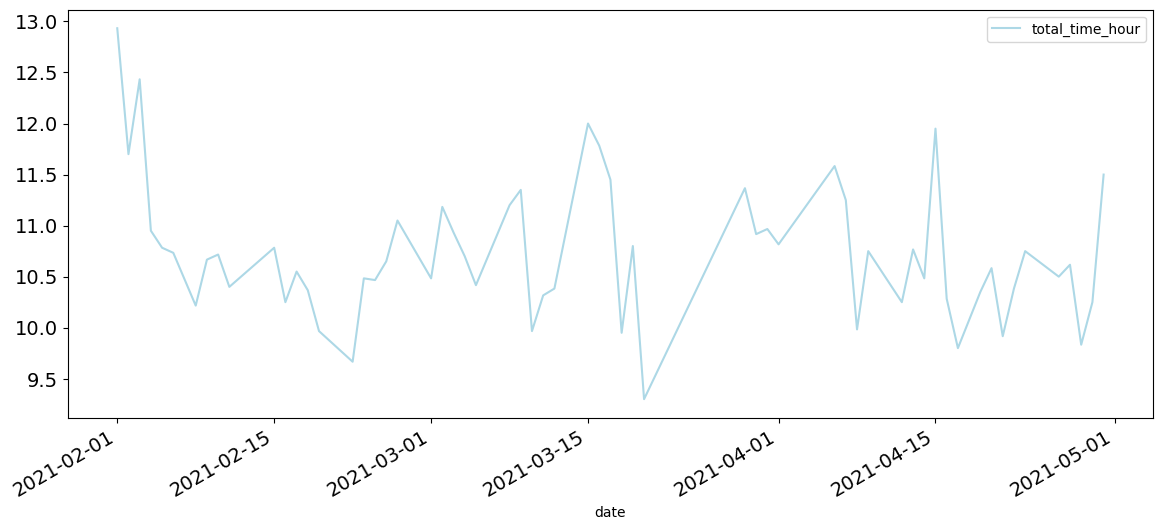

In [112]:
df.plot(x='date', y='total_time_hour', figsize=(14, 6), fontsize=14, color='lightblue')

In [113]:
df.to_csv('cleaned_data3.csv', index=False)